<a href="https://colab.research.google.com/github/RaghavendhraRao/stock_market_prediction_ISE_DSFP/blob/main/ds_final_proj_stock_market_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the ucimlrepo to download the dataset from UCL repository
!pip install ucimlrepo

In [2]:
# Import necessary libraries for data preprocessing and model training
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

In [3]:
# Different numerical results due to floating-point round-off errors from different computation orders.
# To turn them off, set TF_ENABLE_ONEDNN_OPTS = 0
TF_ENABLE_ONEDNN_OPTS=0

# Fetch dataset istanbul stock exchange dataset id
ise_data = fetch_ucirepo(id=247)


In [4]:
# Check the type of dataset
print("dataset type: ", type(ise_data), "\n")

# Print the keys in dataset
print("keys: ", ise_data.keys(), "\n")

# Fetch the stock data from the dataset
data_info = ise_data.data['features']
print("data type: ", type(data_info), "\n")

# print first five rows of the Dataframe to inspect
print("print first 5 rows..!")
print(data_info.head(), "\n")

# Taking new reference variable for testing
stock_data = data_info

dataset type:  <class 'ucimlrepo.dotdict.dotdict'> 

keys:  dict_keys(['data', 'metadata', 'variables']) 

data type:  <class 'pandas.core.frame.DataFrame'> 

print first 5 rows..!
       date       ISE       ISE        SP       DAX      FTSE    NIKKEI  \
0  5-Jan-09  0.035754  0.035754 -0.004679  0.002193  0.003894  0.000000   
1  6-Jan-09  0.025426  0.025426  0.007787  0.008455  0.012866  0.004162   
2  7-Jan-09 -0.028862 -0.028862 -0.030469 -0.017833 -0.028735  0.017293   
3  8-Jan-09 -0.062208 -0.062208  0.003391 -0.011726 -0.000466 -0.040061   
4  9-Jan-09  0.009860  0.009860 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802   



In [5]:
# printing the summary statistics

# print the descriptive statistics includes that summarize the tendency, dispersion & shape of the dataset, exclusing NaN values
print(stock_data.describe(),"\n \n")

# print information about the dataset, including the data types
print(stock_data.info(),"\n \n")

# print the variable/columns of the dataset
print(ise_data.variables,"\n \n")

# print first few rows of date column before converting to datetime format
print(stock_data['date'].head(),"\n \n")

# convert the data to Datetime type
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%b-%y')

# print first few rows of the data
print(stock_data['date'].head(),"\n", "\n")
# print(stock_data.dtypes, "/n")

              ISE         ISE          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001629    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.016264    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.062208   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.006669   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002189    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.010584    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.068952    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936  
std      0.015751    0.012990    0.010501  
min     -0.053849   -0.048817   -0.038564  
25%     -0.007215   -0.005952   -0.004911  
50%   

In [6]:
# set the date column as Index
stock_data.set_index('date', inplace=True)

# #print few rows
# print("First few rows from the stock dataset...!")
# print(stock_data.head(),"\n \n")

# check for null values in the dataset
print("Check null values...!")
data_null_values = stock_data.isnull().sum()
print("null values found in dataset: ", data_null_values,"\n \n")

# calculating the mean of each month and restructure the data
print("Calculating the mean for each month...!")
stock_mean_data = stock_data.resample('M').mean()
print(stock_mean_data.head(),"\n \n")


# removing the duplicates in the columns
print("Removing the duplicate columns...!")
stock_mean_data = stock_mean_data.loc[:, ~stock_mean_data.columns.duplicated()]

# print first few rows of the data
print(stock_mean_data.head(),"\n \n")

Check null values...!
null values found in dataset:  ISE        0
ISE        0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64 
 

Calculating the mean for each month...!
                 ISE       ISE        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-31 -0.002024 -0.002024 -0.006033 -0.006827 -0.004735 -0.006165   
2009-02-28 -0.003820 -0.003820 -0.005823 -0.006052 -0.004006 -0.002736   
2009-03-31  0.003175  0.003175  0.003725  0.002764  0.001125  0.003139   
2009-04-30  0.009799  0.009799  0.004275  0.007379  0.003704  0.004044   
2009-05-31  0.005297  0.005297  0.002722  0.001858  0.002117  0.003984   

             BOVESPA        EU        EM  
date                                      
2009-01-31 -0.001186 -0.004690 -0.003085  
2009-02-28 -0.001443 -0.004956 -0.001480  
2009-03-31  0.003153  0.001523  0.004435  
2009-04-30  0.006883  0.005386  0.00532

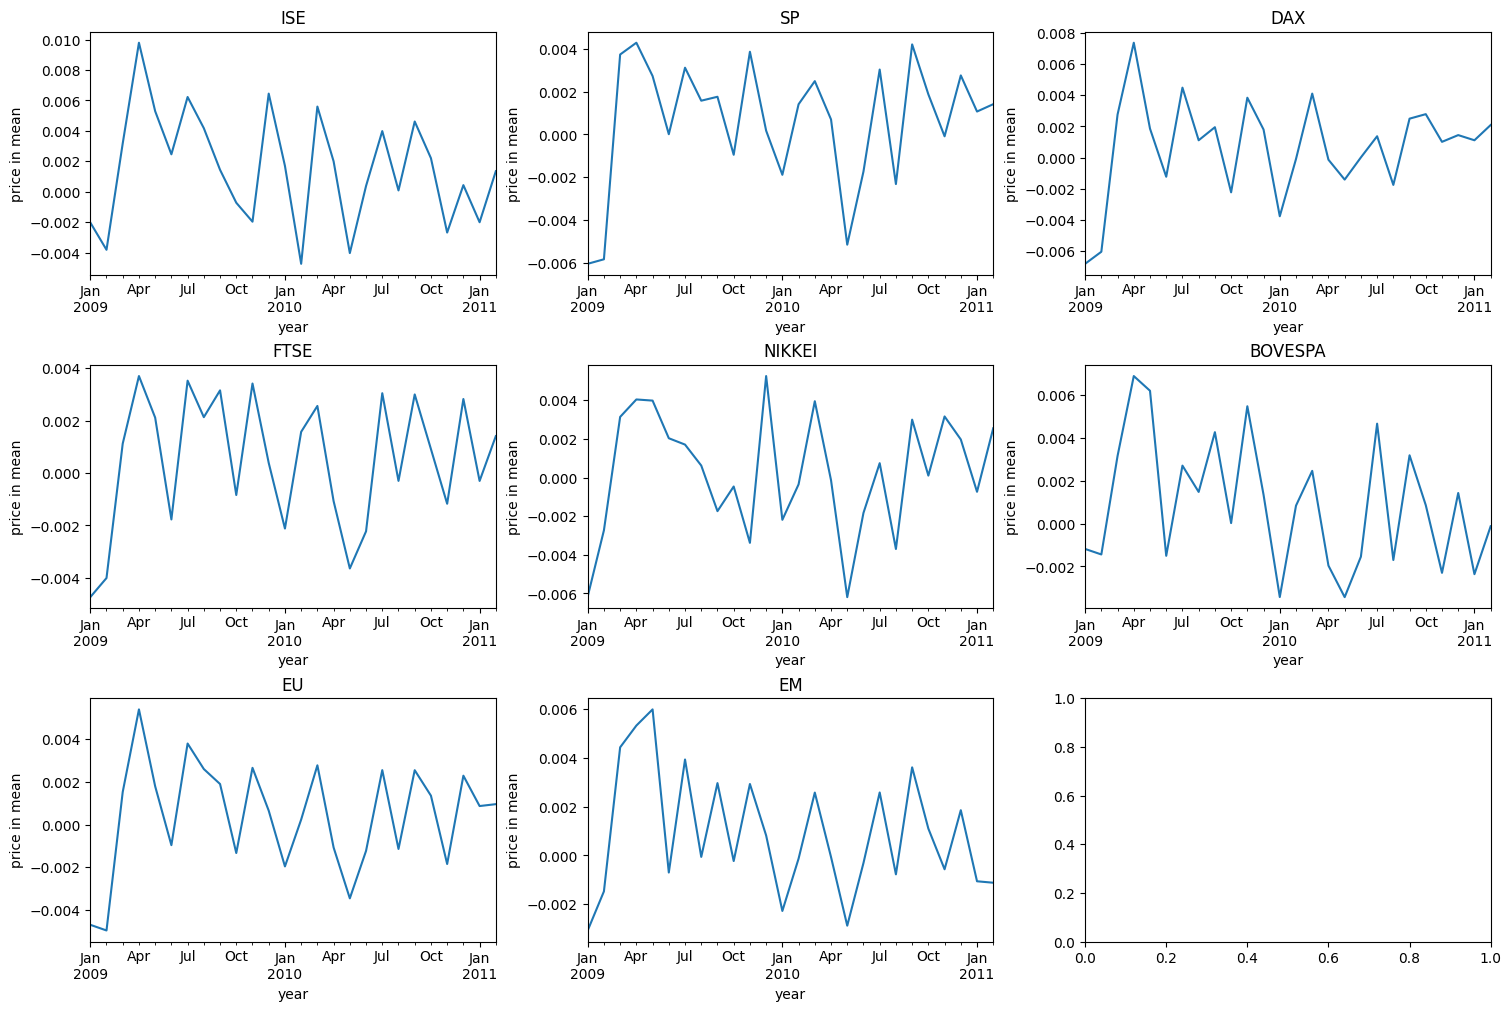

In [7]:
# Plot each column in the data

# Create a 3x3 grid of subplots with a specified figure size and layout constraints
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
data_columns = stock_mean_data.columns
for col, ax in enumerate(axes.flat):
    if col < len(data_columns):
        # Plot the mean data for each column
        stock_mean_data[data_columns[col]].plot(ax=ax)
        # Set the title and labels for each subplot
        ax.set_title(data_columns[col])
        ax.set_xlabel('year')
        ax.set_ylabel('price in mean')

# show the plots
plt.show()

In [8]:
# removing the duplicates in the columns from the dataset
print("Removing the duplicate columns...!")
stock_data = stock_data.loc[:, ~stock_data.columns.duplicated()]
print(stock_data.head(),"\n \n")

Removing the duplicate columns...!
                 ISE        SP       DAX      FTSE    NIKKEI   BOVESPA  \
date                                                                     
2009-01-05  0.035754 -0.004679  0.002193  0.003894  0.000000  0.031190   
2009-01-06  0.025426  0.007787  0.008455  0.012866  0.004162  0.018920   
2009-01-07 -0.028862 -0.030469 -0.017833 -0.028735  0.017293 -0.035899   
2009-01-08 -0.062208  0.003391 -0.011726 -0.000466 -0.040061  0.028283   
2009-01-09  0.009860 -0.021533 -0.019873 -0.012710 -0.004474 -0.009764   

                  EU        EM  
date                            
2009-01-05  0.012698  0.028524  
2009-01-06  0.011341  0.008773  
2009-01-07 -0.017073 -0.020015  
2009-01-08 -0.005561 -0.019424  
2009-01-09 -0.010989 -0.007802   
 



In [9]:
# Identify the key features and targeted feature
# These features are used to train the model
X_stock_key_features = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']
# Target featuer used for forecasting the future
Y_stock_target = ['ISE']


In [10]:
def train_test_split_data(stock_data, X_stock_features, Y_stock_target):
  '''
  Split the stock data into training and testing

  Parameters:
  stock_data(Dataframe): The Dataframe containing the stock data
  X_stock_features : List of the feature columns (X) to be used as input
  Y_stock_target : Column name of the target variable (Y) to be predicted.

  Returns:
  x_train, x_test, y_train, y_test : Returns the training and testing for both features

  '''
  # split the data into training and testing with testsize 20%
  # random_state=42 ensure that split data is reproducible
  x_train, x_test, y_train, y_test = train_test_split(stock_data[X_stock_key_features], + stock_data[Y_stock_target],
                                                      test_size=0.2, random_state=42)

  return x_train, x_test, y_train, y_test

# Function used to split the training and testing sets
x_train, x_test, y_train, y_test = train_test_split_data(stock_data, X_stock_key_features, Y_stock_target)

print(len(x_train))

print(y_train.shape)
print(y_test.shape)

428
(428, 1)
(108, 1)


# **Normalization**

In [11]:
def normalize_data(x_train, x_test, y_train, y_test):
  """
  This function used to normalize the training and testing data.

  Parameters:
  x_train, x_test : These are the training and testing features
  y_train, y_test : These are the training and testing target variables

  Returns:
  norm_x_train, norm_x_test, norm_y_train, norm_y_test : Returns the normalized features and target.
  """
  # Initilize the scalar
  scaler_data =MinMaxScaler()

  norm_x_train = scaler_data.fit_transform(x_train) # features variable
  norm_x_test = scaler_data.transform(x_test)
  norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
  norm_y_test = scaler_data.transform(y_test)

  return norm_x_train, norm_x_test, norm_y_train, norm_y_test

# Function used to normalize the features and target variables
norm_x_train, norm_x_test, norm_y_train, norm_y_test = normalize_data(x_train, x_test, y_train, y_test)

# print the shape of each variables
# Here X is the rows and y is the columns
print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(428, 7)
(428, 1)
(108, 7)
(108, 1)


In [50]:
# Reshape the normalized data by adding a timestep dimension
# here 1 is the timestep
norm_x_train = norm_x_train.reshape((norm_x_train.shape[0], 1, norm_x_train.shape[1]))
norm_x_test = norm_x_test.reshape((norm_x_test.shape[0], 1, norm_x_test.shape[1]))

In [51]:
print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(428, 1, 7)
(428, 1)
(108, 1, 7)
(108, 1)


# **Implementing LSTM MODEL**

In [52]:
def lstm_model(norm_x_train):
  '''
  Build the LSTM model from scratch for timeseries forecasting
  Parameters:
  norm_x_train: normalize the training data used to define the Input shape
  Returns:
  model: Returns the compiled LSTM model ready for training.
  '''

  # Initial the sequential model
  model = Sequential()
  # Layer 1 with 128 units
  # Return_sequences=True means this layer will return full sequence output
  model.add(LSTM(units=128, return_sequences=True, input_shape=(norm_x_train.shape[1], norm_x_train.shape[2])))
  # Adding dropout layer with a rate of 0.3 (30%) to prevent overfittinig
  model.add(Dropout(0.3))

  # Layer 2 with 64 units
  model.add(LSTM(units=64, return_sequences=True))
  # Adding dropout layer with a rate of 0.3 (30%) to prevent overfittinig
  model.add(Dropout(0.3))

  # Layer 3 with 32 units
  model.add(LSTM(units=32))
  # Output layer: Dense layer with a single neuron to predict the target value
  model.add(Dense(1)) # predicting only single values index(ISE) (predict single continuous value)

  # compile the model
  model.compile(loss='mean_squared_error', #calculate the error (pred & act)
                optimizer=Adam(learning_rate=0.0003), #minimize the loss function.
                metrics=['mean_absolute_error']) # compiling the model


  return model




In [53]:
# function calling the lstm model using the normalized training data
# to define the input shape
lstm_model = lstm_model(norm_x_train)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
# model summary
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 128)              │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,489 (513.63 KB)

 Trainable params: 131,489 (513.63 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# train the model
history = lstm_model.fit(norm_x_train, norm_y_train, epochs=100, batch_size=16,
                         validation_split=0.2, verbose=1)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2261 - mean_absolute_error: 0.4616 - val_loss: 0.2252 - val_mean_absolute_error: 0.4575
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1949 - mean_absolute_error: 0.4265 - val_loss: 0.1639 - val_mean_absolute_error: 0.3867
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1260 - mean_absolute_error: 0.3383 - val_loss: 0.0651 - val_mean_absolute_error: 0.2331
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0377 - mean_absolute_error: 0.1710 - val_loss: 0.0078 - val_mean_absolute_error: 0.0696
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0872 - val_loss: 0.0077 - val_mean_absolute_error: 0.0714
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0829 - val_loss: 0.0080 - val_mean_absolute_error: 0.0730
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0862 - val_los

In [56]:
# predict the test data with lstm model
y_pred = lstm_model.predict(norm_x_test)
y_pred.shape

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


(108, 1)

In [57]:
# just for checking
# predicting the training data
y_pred_train = lstm_model.predict(norm_x_train)
y_pred_train.shape

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(428, 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - mean_absolute_error: 0.0760 


training loss:  0.010687428526580334


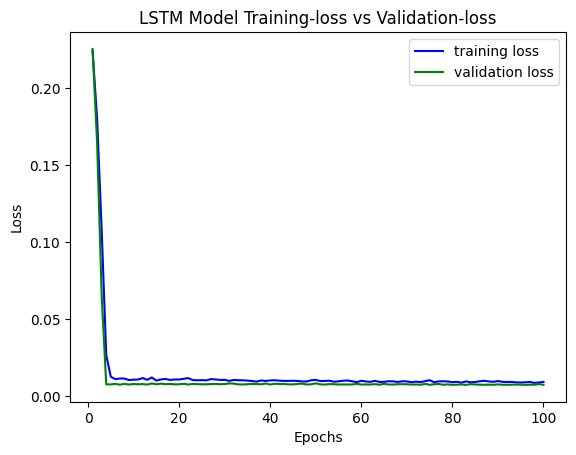

In [58]:

#Access the training data  to check the training loss and Mean Absolute Error (MAE)
training_hist = history.history

# evaluate model
train_loss, train_mean_absolute_error = lstm_model.evaluate(norm_x_test, norm_y_test)
print("\n")
print("training loss: ", train_loss)



# visualize the training loss and validation loss from training hstory
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)
plt.plot(training_epochs, training_loss, 'b', label='training loss')
plt.plot(training_epochs, training_val_loss, 'g', label='validation loss')
# Set the title and labels for plot
plt.title("LSTM Model Training-loss vs Validation-loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# Add legend to differentiate between the lines on graph
plt.legend()
# show the plot
plt.show()

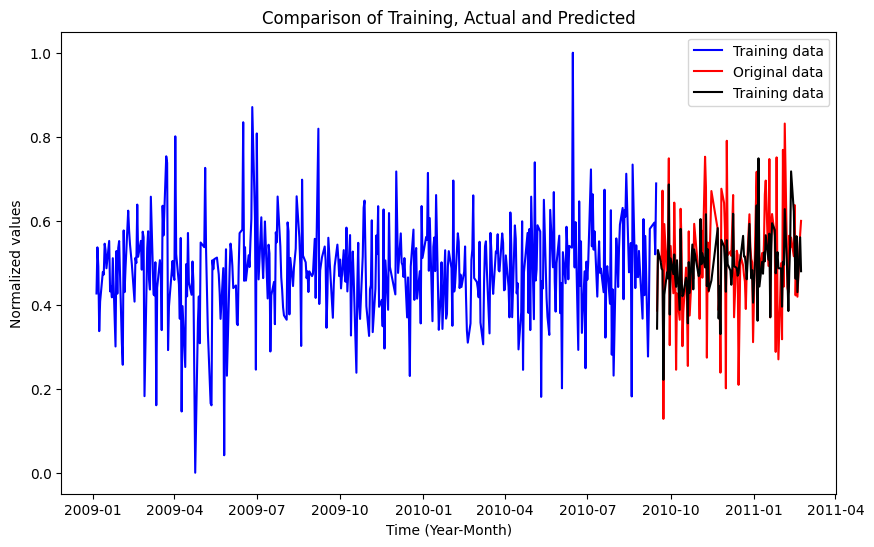

In [59]:
dates = stock_data.index


# visualize the training data, actual data and predicted data
plt.figure(figsize=(10,6))

# plot the training data, represent the normalized training data
plt.plot(dates[:len(norm_y_train)], norm_y_train, label='Training data', color='blue')

# plot the actual data, represent the normalized y_test data
plt.plot(dates[len(norm_y_train):len(norm_y_train)+len(norm_y_train)], norm_y_test, label='Original data', color='red')

# plot the predicted data, represent the prediction made by the model
plt.plot(dates[len(norm_y_train):len(norm_y_train)+len(y_pred)], y_pred, label='Training data', color='black')

# Add the title and labels for the graphs
# legend to differentiate between the lines and graph
plt.title("Comparison of Training, Actual and Predicted")
plt.xlabel('Time (Year-Month)')
plt.ylabel('Normalized values')
plt.legend()
# show the plot
plt.show()

In [60]:
def calculate_error_rate(norm_y_test, y_pred):
  # check and convert the predicted and norm_y_test are numpy(np) arrays
  y_pred = np.array(y_pred)
  norm_y_test = np.array(norm_y_test)

  # calculate the Mean Absolute Error (MAE)
  lstm_mae = mean_absolute_error(norm_y_test, y_pred)

  # calculate the Mean Absolute Percentage Error (MAPE)
  lstm_mape = mean_absolute_percentage_error(norm_y_test, y_pred)

  # calculate the Mean Squared Error (MSE)
  lstm_mse = mean_squared_error(norm_y_test, y_pred)

  # calculate the Root Mean Squared Error (RMSE)
  lstm_rmse = np.sqrt(lstm_mse)

  return lstm_mae, lstm_mape, lstm_mse, lstm_rmse

# FUnction used to calculate the error metrics
lstm_mae, lstm_mape, lstm_mse, lstm_rmse = calculate_error_rate(norm_y_test, y_pred)

# print the error metrics values
print(f"Mean absolute error: {lstm_mae} ")
print(f"Mean absolute percentage Error: {lstm_mape} ")
print(f"Mean squared Error: {lstm_mse} ")
print(f"Root mean square error: {lstm_rmse} ")

Mean absolute error: 0.07805162832452757 
Mean absolute percentage Error: 0.1809502874064022 
Mean squared Error: 0.01068742810996216 
Root mean square error: 0.10338001794332481 


# **LSTM model with feature extraction**

In [61]:
# print first few rows of the dataset
stock_data.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
2009-01-05,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [62]:
# Calculate the correlation matrix for the stock data
# This will show the pairwise correlation between all columns in the dataframe
stock_corr_matrix_data = stock_data.corr()

# Display the correlation matrics
stock_corr_matrix_data

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE,1.000000,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
SP,0.439489,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


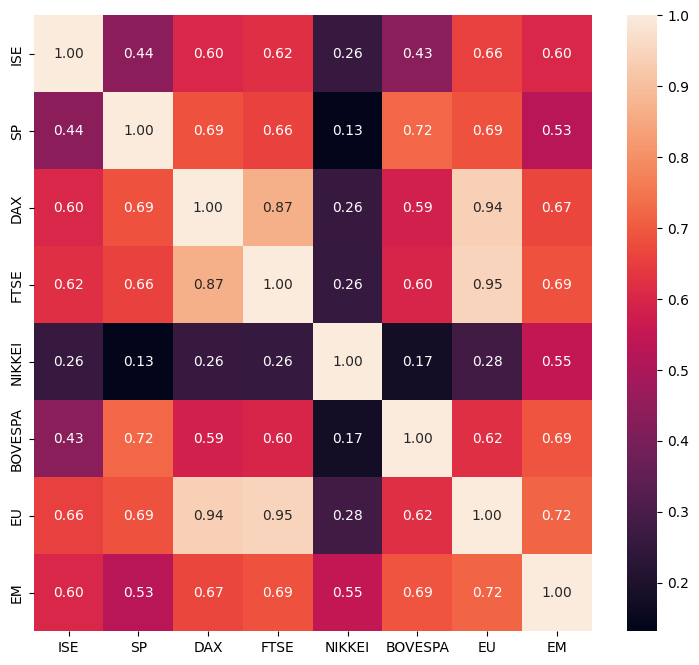

In [63]:
# Visualize the correlation matrix using a heat map
# Set the size of the figure
plt.figure(figsize=(9,8))
# set annot=True, add the correlation values on the heatmap
# fmt=".2f" format the correlation coefficient to two decimal places
sns.heatmap(stock_corr_matrix_data, annot=True, fmt=".2f")

# show the heat map
plt.show()

In [64]:
# Extracted the unwanted features from the matrix
stock_feature_extracted_data = stock_data.drop(columns = ['FTSE','EU','EM'])
print(stock_feature_extracted_data.head())

# Get the correalation for the featured data
fe_stock_corr_matrix_data = stock_feature_extracted_data.corr()
print("\n",fe_stock_corr_matrix_data.head())

                 ISE        SP       DAX    NIKKEI   BOVESPA
date                                                        
2009-01-05  0.035754 -0.004679  0.002193  0.000000  0.031190
2009-01-06  0.025426  0.007787  0.008455  0.004162  0.018920
2009-01-07 -0.028862 -0.030469 -0.017833  0.017293 -0.035899
2009-01-08 -0.062208  0.003391 -0.011726 -0.040061  0.028283
2009-01-09  0.009860 -0.021533 -0.019873 -0.004474 -0.009764

               ISE        SP       DAX    NIKKEI   BOVESPA
ISE      1.000000  0.439489  0.602081  0.260052  0.432898
SP       0.439489  1.000000  0.685843  0.131250  0.722069
DAX      0.602081  0.685843  1.000000  0.258538  0.585791
NIKKEI   0.260052  0.131250  0.258538  1.000000  0.172752
BOVESPA  0.432898  0.722069  0.585791  0.172752  1.000000


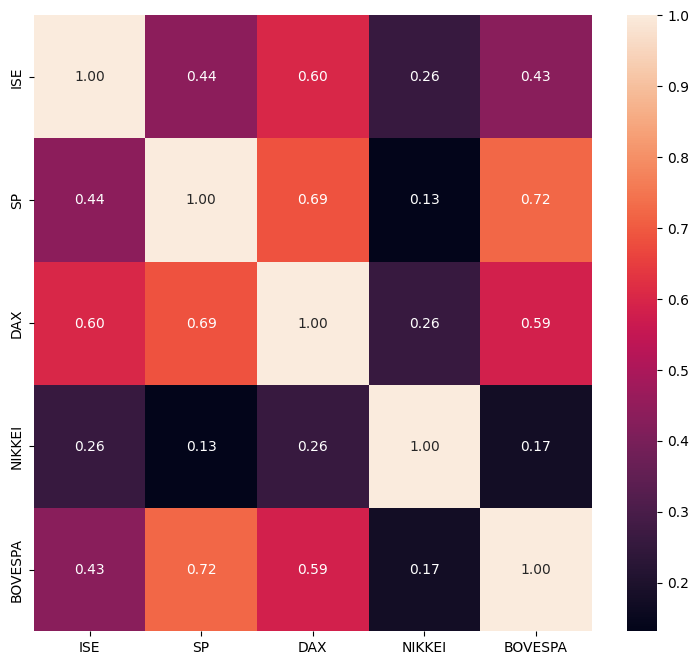

In [65]:
# Visualize the correlation matrix using a heat map
# Set the size of the figure
plt.figure(figsize=(9,8))
# set annot=True, add the correlation values on the heatmap
# fmt=".2f" format the correlation coefficient to two decimal places
sns.heatmap(fe_stock_corr_matrix_data, annot=True, fmt=".2f")

# show the heat map
plt.show()

In [66]:
# Identify the key features and targeted feature
# These features are used to train the model
X_stock_key_features = ['SP', 'DAX', 'NIKKEI', 'BOVESPA']
# Target featuer used for forecasting the future
Y_stock_target = ['ISE']

In [67]:
# split the extracted feature data into training and testing
x_train, x_test, y_train, y_test = train_test_split_data(stock_feature_extracted_data, X_stock_key_features, Y_stock_target)

print(len(x_train))

print(y_train.shape)
print(y_test.shape)

428
(428, 1)
(108, 1)


In [68]:
# normalize the featured stock data
fe_norm_x_train, fe_norm_x_test, fe_norm_y_train, fe_norm_y_test = normalize_data(x_train, x_test, y_train, y_test)

print(fe_norm_x_train.shape)
print(fe_norm_y_train.shape)
print(fe_norm_x_test.shape)
print(fe_norm_y_test.shape)

(428, 4)
(428, 1)
(108, 4)
(108, 1)


In [69]:
# Reshape the normalized data by adding a timestep dimension
fe_norm_x_train = fe_norm_x_train.reshape((fe_norm_x_train.shape[0], 1, fe_norm_x_train.shape[1]))
fe_norm_x_test = fe_norm_x_test.reshape((fe_norm_x_test.shape[0], 1, fe_norm_x_test.shape[1]))

In [70]:
print(fe_norm_x_train.shape)
print(fe_norm_y_train.shape)
print(fe_norm_x_test.shape)
print(fe_norm_y_test.shape)

(428, 1, 4)
(428, 1)
(108, 1, 4)
(108, 1)


In [71]:
def lstm_model(norm_x_train):
  # Build the LSTM model from scratch
  model = Sequential()
  model.add(LSTM(units=128, return_sequences=True, input_shape=(norm_x_train.shape[1], norm_x_train.shape[2]))) #layer 1 with 50 units
  model.add(Dropout(0.3)) # prevent overfitting given 10% loss for every epoch
  model.add(LSTM(units=64, return_sequences=True)) # layer 2 with 64 units will only return the last output seq
  model.add(Dropout(0.3))
  model.add(LSTM(units=32))
  model.add(Dense(1)) # predicting only single values index(ISE) (predict single continuous value)


  model.compile(loss='mean_squared_error', #calculate the error (pred & act)
                optimizer=Adam(learning_rate=0.0003), #minimize the loss function.
                metrics=['mean_absolute_error']) # compiling the model


  return model


# function calling the lstm model using the normalized training data
# to define the input shape
fe_lstm_model = lstm_model(fe_norm_x_train)

# get the model summary for featured extraction
fe_lstm_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 1, 128)              │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,953 (507.63 KB)

 Trainable params: 129,953 (507.63 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# train the model
history1 = fe_lstm_model.fit(fe_norm_x_train, fe_norm_y_train, epochs=100, batch_size=16,
                         validation_split=0.2, verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2331 - mean_absolute_error: 0.4693 - val_loss: 0.2356 - val_mean_absolute_error: 0.4682
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2064 - mean_absolute_error: 0.4392 - val_loss: 0.1911 - val_mean_absolute_error: 0.4188
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1616 - mean_absolute_error: 0.3872 - val_loss: 0.1158 - val_mean_absolute_error: 0.3193
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0760 - mean_absolute_error: 0.2541 - val_loss: 0.0245 - val_mean_absolute_error: 0.1306
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0975 - val_loss: 0.0097 - val_mean_absolute_error: 0.0772
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0905 - val_loss: 0.0106 - val_mean_absolute_error: 0.0829
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0870 - val_los

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 - mean_absolute_error: 0.0828 


training loss:  0.012228983454406261


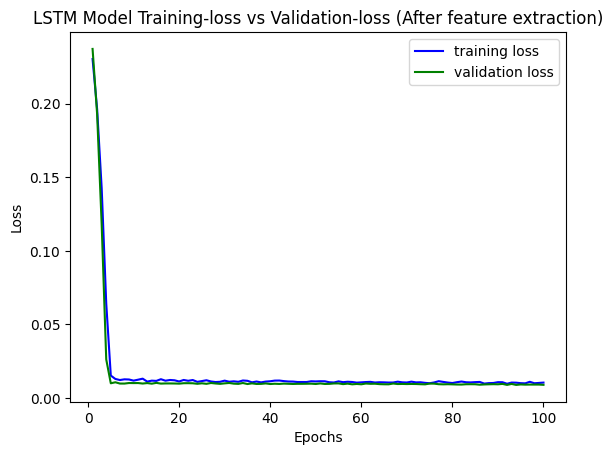

In [35]:
#Access the training data  to check the loss and MAE
training_hist = history1.history

# evaluate model
train_loss, train_mean_absolute_error = fe_lstm_model.evaluate(fe_norm_x_test, fe_norm_y_test)
print("\n")
print("training loss: ", train_loss)



# visualize the training loss and validation loss from training hstory
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)
plt.plot(training_epochs, training_loss, 'b', label='training loss')
plt.plot(training_epochs, training_val_loss, 'g', label='validation loss')
# Set the title and labels for plot
plt.title("LSTM Model Training-loss vs Validation-loss (After feature extraction)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# Add legend to differentiate between the lines on graph
plt.legend()
# show the plot
plt.show()

In [73]:
# predict the test data with lstm model
y_pred = fe_lstm_model.predict(fe_norm_x_test)
y_pred.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


(108, 1)

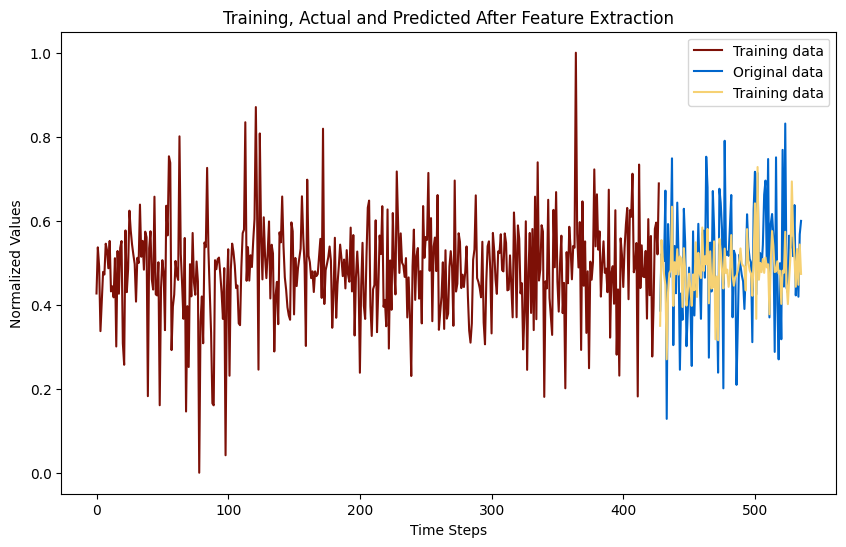

In [74]:
# visualize the training data, actual data and predicted data
plt.figure(figsize=(10,6))

# plot the training data
plt.plot(range(len(fe_norm_y_train)), fe_norm_y_train, label='Training data', color='#7D1007')

# plot the actual data
plt.plot(range(len(fe_norm_y_train), 536), fe_norm_y_test, label='Original data', color='#06C')

# plot the predicted data
plt.plot(range(len(fe_norm_y_train), 536), y_pred, label='Training data', color='#F6D173')

# Add the title and labels for the graphs
plt.title("Training, Actual and Predicted After Feature Extraction")
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

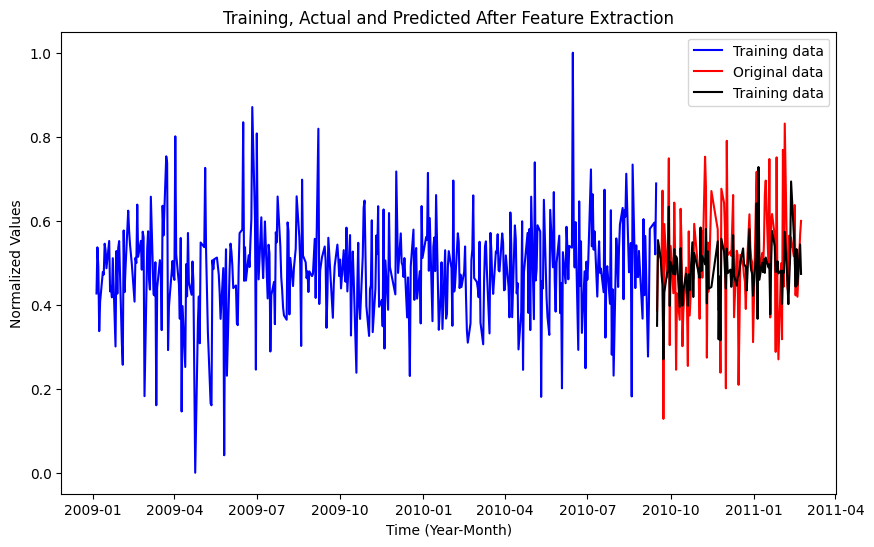

In [75]:
dates = stock_data.index


# visualize the training data, actual data and predicted data
plt.figure(figsize=(10,6))

# plot the training data, represent the normalized training data
plt.plot(dates[:len(fe_norm_y_train)], fe_norm_y_train, label='Training data', color='blue')

# plot the actual data, represent the normalized y_test data
plt.plot(dates[len(fe_norm_y_train):len(fe_norm_y_train)+len(fe_norm_y_train)], fe_norm_y_test, label='Original data', color='red')

# plot the predicted data, represent the prediction made by the model
plt.plot(dates[len(fe_norm_y_train):len(fe_norm_y_train)+len(y_pred)], y_pred, label='Training data', color='black')

# Add the title and labels for the graphs
plt.title("Training, Actual and Predicted After Feature Extraction")
plt.xlabel('Time (Year-Month)')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

In [76]:
# Calculate the error metrics
lstm_mae, lstm_mape, lstm_mse, lstm_rmse = calculate_error_rate(fe_norm_y_test, y_pred)

# print the error metrics values
print(f"Mean absolute error: {lstm_mae} ")
print(f"Mean absolute percentage Error: {lstm_mape} ")
print(f"Mean squared Error: {lstm_mse} ")
print(f"Root mean square error: {lstm_rmse} ")

Mean absolute error: 0.08473937709249266 
Mean absolute percentage Error: 0.19488124780086333 
Mean squared Error: 0.01251639210981075 
Root mean square error: 0.11187668260102616 


## Implementing ARIMA model

In [77]:
# install the pmdarimaa library
!pip install pmdarima

# Import the necessary libraries
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
# Identify the key features and targeted feature
# These features are used to train the model
X_stock_key_features = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']
# Target featuer used for forecasting the future
Y_stock_target = ['ISE']

# split the extracted feature data into training and testing
x_train, x_test, y_train, y_test = train_test_split_data(stock_data, X_stock_key_features, Y_stock_target)

print(len(x_train))

print(y_train.shape)
print(y_test.shape)



428
(428, 1)
(108, 1)


In [79]:
# Function used to normalize the features and target variables
norm_x_train, norm_x_test, norm_y_train, norm_y_test = normalize_data(x_train, x_test, y_train, y_test)

print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

(428, 7)
(428, 1)
(108, 7)
(108, 1)


In [80]:
# convert the norm_y_train and norm_y_test to 1D array through flatten
norm_y_train_flat = norm_y_train.flatten()
norm_y_test_flat = norm_y_test.flatten()

print(norm_y_train_flat.shape)
print(norm_y_test_flat.shape)

(428,)
(108,)


In [81]:
# Build ARIMA model,
# Find the best order for AR(P), I(q), M(d) parameters using auto_arima,
# set the seasonality = True, to get the best sasonality order.

arima_auto_model = auto_arima(norm_y_train_flat, exogenous=norm_x_train, seasonal=False,
                              trace=True, error_action='ignore',
                              suppress_warnings=True, stepwise=True)


# Identify the best order through auto_arima
arima_best_order = arima_auto_model.order
arima_best_order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=617.842, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-318.253, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=274.262, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-453.961, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.43 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=2.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-599.658, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-598.345, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-597.695, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-597.668, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-596.969, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-595.691, Time=0.2

(2, 0, 0)

In [82]:
# Use the SARIMAX model using the optimal order to train
# SARIMAX use both features and target for training the data unlike ARIMA it accepts only target data
arima_model = SARIMAX(norm_y_train_flat, exog=norm_x_train, order=arima_best_order)
arima_model = arima_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
# summarize the arima_model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  428
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 413.896
Date:                Thu, 29 Aug 2024   AIC                           -807.792
Time:                        00:33:02   BIC                           -767.201
Sample:                             0   HQIC                          -791.761
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0991      0.056      1.773      0.076      -0.010       0.209
x2             0.0009      0.085      0.011      0.991      -0.166       0.168
x3             0.2788      0.117      2.382      0.017       0.049       0.508
x4             0.0419      0.044      0.950      0.342      -0.045       0.128
x5            -0.0522      0.053     -0.981      0.327      -0.156       0.052
x6             0.2933      0.184      1.593      0.111      -0.067       0.654
x7             0.3489      0.071      4.944      0.000       0.211       0.487
ar.L1          0.0003      0.055      0.006      0.995      -0.108       0.108
ar.L2          0.0506      0.053      0.948      0.343      -0.054       0.155
sigma2         0.0085      0.000     17.193      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
# use the model to predict on the training data
armia_predict = arima_model.predict(start=0, end=len(norm_y_train_flat)-1,
                                    exog=norm_x_train)
# print the shape of the model
armia_predict.shape

(428,)

In [85]:
# Forecast the model on the test data (target)
arima_forecast = arima_model.forecast(steps=len(norm_y_test_flat), exog=norm_x_test)
# print the shape of the model
arima_forecast.shape

(108,)

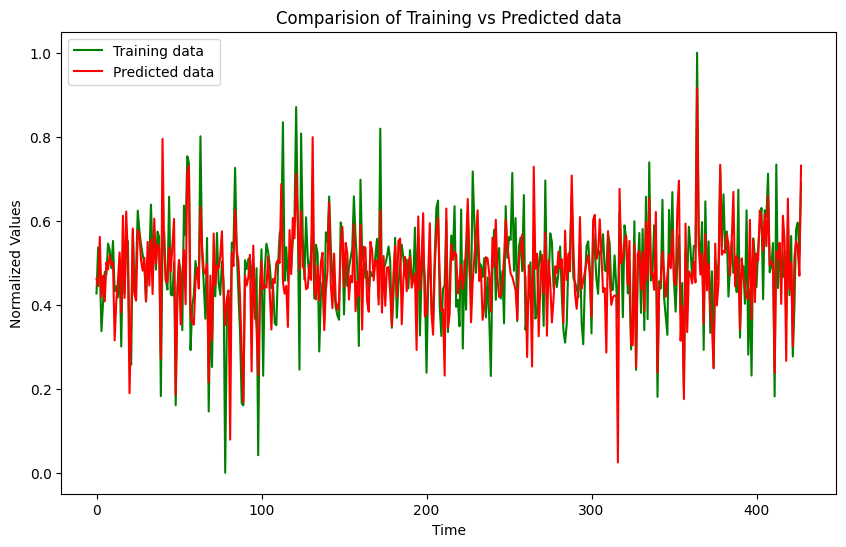

In [86]:
# visualize the data
# Set the figure size
plt.figure(figsize=(10,6))
# plot the training data and predicted data
plt.plot(norm_y_train_flat, label='Training data', color='g')
plt.plot(armia_predict, label='Predicted data', color='red')

# Add the title and labels for the graphs
# legend to differentiate between the lines and graph
plt.title('Comparision of Training vs Predicted data')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.legend()
# show the plot
plt.show()

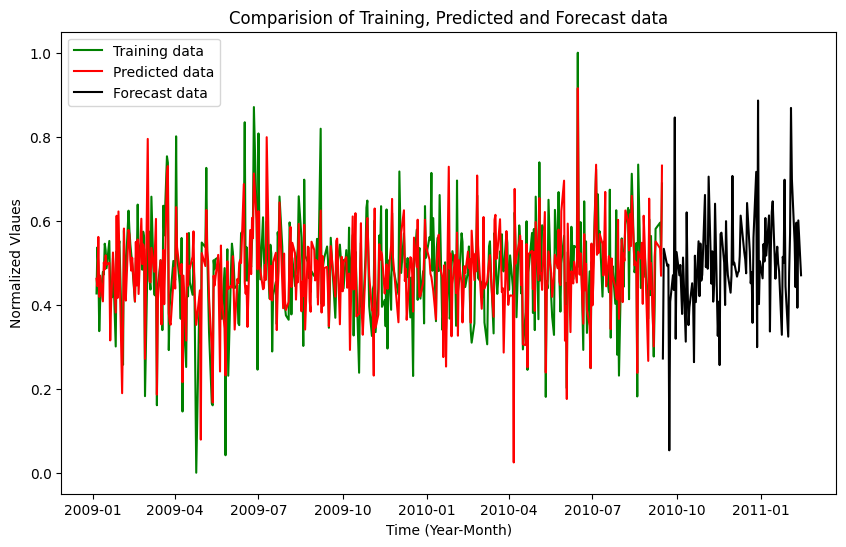

In [88]:
dates = stock_data.index[:len(norm_y_train_flat)]

# visualize the data
# Set the figure size
plt.figure(figsize=(10,6))
# plot the training data, predicted data, and forecast data
plt.plot(dates, norm_y_train_flat, label='Training data', color='g')
plt.plot(dates, armia_predict, label='Predicted data', color='red')
fore_start_index = len(dates)
forecast_dates =  pd.date_range(start=dates[-1], periods=len(arima_forecast)+1, freq='B')[1:]
plt.plot(forecast_dates, arima_forecast, label='Forecast data', color='black')
# Add the title and labels for the graphs
# legend to differentiate between the lines and graph
plt.title('Comparision of Training, Predicted and Forecast data')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Normalized Vlaues')
plt.legend()
# show the plot
plt.show()

In [89]:
# Function used to calculate the error metrics
lstm_mae, lstm_mape, lstm_mse, lstm_rmse = calculate_error_rate(norm_y_test, arima_forecast)

# print the error metricsvalues
print(f"Mean absolute error: {lstm_mae} ")
print(f"Mean absolute percentage Error: {lstm_mape} ")
print(f"Mean squared Error: {lstm_mse} ")
print(f"Root mean square error: {lstm_rmse} ")

Mean absolute error: 0.08002980878808412 
Mean absolute percentage Error: 0.17791115545746639 
Mean squared Error: 0.011184905884496069 
Root mean square error: 0.10575871540679789 


# **ARIMA Feature extraction**

In [90]:
# Identify the key features and targeted feature
# These features are used to train the model
X_stock_key_features = ['SP', 'DAX', 'NIKKEI', 'BOVESPA']
# Target feature used for forecasting the future
Y_stock_target = ['ISE']

# split the extracted feature data into training and testing
x_train, x_test, y_train, y_test = train_test_split_data(stock_feature_extracted_data, X_stock_key_features, Y_stock_target)

print(len(x_train))

print(y_train.shape)
print(y_test.shape)

428
(428, 1)
(108, 1)


In [91]:
# Function used to normalize the features and target variables
norm_x_train, norm_x_test, norm_y_train, norm_y_test = normalize_data(x_train, x_test, y_train, y_test)

print(norm_x_train.shape)
print(norm_y_train.shape)
print(norm_x_test.shape)
print(norm_y_test.shape)

# convert the norm_y_train and norm_y_test to 1D array through flatten
norm_y_train_flat = norm_y_train.flatten()
norm_y_test_flat = norm_y_test.flatten()



(428, 4)
(428, 1)
(108, 4)
(108, 1)


In [92]:
# Build ARIMA model,
# Find the best order for AR(P), I(q), M(d) parameters using auto_arima,
# set the seasonality = True, to get the best sasonality order.

arima_auto_model = auto_arima(norm_y_train_flat, exogenous=norm_x_train, seasonal=False,
                              trace=True, error_action='ignore',
                              suppress_warnings=True, stepwise=True)


# Identify the best order through auto_arima
arima_best_order = arima_auto_model.order
arima_best_order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=617.842, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-318.253, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=274.262, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-453.961, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-599.658, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-598.345, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-597.695, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-597.668, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-596.969, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-595.691, Time=0.3

(2, 0, 0)

In [93]:
# Use the SARIMAX model using the optimal order to train
# SARIMAX use both features and target for training the data unlike ARIMA it accepts only target data
arima_model = SARIMAX(norm_y_train_flat, exog=norm_x_train, order=arima_best_order)
arima_model = arima_model.fit(disp=False)

# summarize the arima_model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  428
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 381.715
Date:                Thu, 29 Aug 2024   AIC                           -749.429
Time:                        00:35:53   BIC                           -721.015
Sample:                             0   HQIC                          -738.207
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0816      0.054      1.514      0.130      -0.024       0.187
x2             0.5284      0.048     11.120      0.000       0.435       0.622
x3             0.2117      0.029      7.208      0.000       0.154       0.269
x4             0.1495      0.047      3.193      0.001       0.058       0.241
ar.L1          0.0056      0.053      0.105      0.916      -0.098       0.109
ar.L2          0.1091      0.051      2.139      0.032       0.009       0.209
sigma2         0.0098      0.001     16.033      0.000       0.009       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.25
Prob(Q):                              0.93   Prob(JB):                         0.03
Heteroskedasticity (H):               0.73   Skew:                            -0.04
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
# use the model to predict on the training data
armia_predict = arima_model.predict(start=0, end=len(norm_y_train_flat)-1,
                                    exog=norm_x_train)
armia_predict.shape

# Forecast the model on the test data (target)
arima_forecast = arima_model.forecast(steps=len(norm_y_test_flat), exog=norm_x_test)
arima_forecast.shape


(108,)

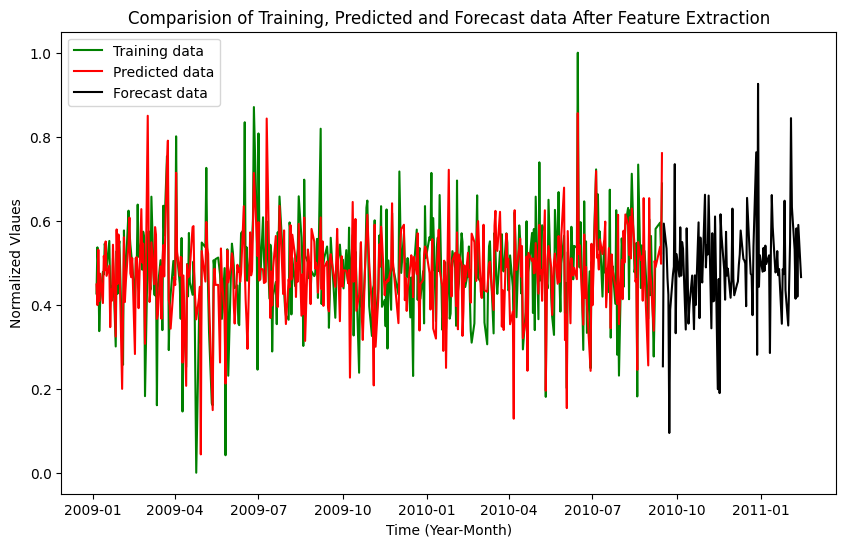

In [104]:
dates = stock_data.index[:len(norm_y_train_flat)]

# visualize the data
# Set the figure size
plt.figure(figsize=(10,6))
# plot the training data, predicted data, and forecast data
plt.plot(dates, norm_y_train_flat, label='Training data', color='g')
plt.plot(dates, armia_predict, label='Predicted data', color='red')
fore_start_index = len(dates)
forecast_dates =  pd.date_range(start=dates[-1], periods=len(arima_forecast)+1, freq='B')[1:]
plt.plot(forecast_dates, arima_forecast, label='Forecast data', color='black')
# Add the title and labels for the graphs
# legend to differentiate between the lines and graph
plt.title('Comparision of Training, Predicted and Forecast data After Feature Extraction')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Normalized Vlaues')
plt.legend()
# show the plot
plt.show()

In [105]:
# Function used to calculate the error metrics
lstm_mae, lstm_mape, lstm_mse, lstm_rmse = calculate_error_rate(norm_y_test, arima_forecast)

# print theerror metrics values
print(f"Mean absolute error: {lstm_mae} ")
print(f"Mean absolute percentage Error: {lstm_mape} ")
print(f"Mean squared Error: {lstm_mse} ")
print(f"Root mean square error: {lstm_rmse} ")

Mean absolute error: 0.08512517257293546 
Mean absolute percentage Error: 0.18818615814071707 
Mean squared Error: 0.013013011506254793 
Root mean square error: 0.1140745874691414 


# **Implementing Prophet model**

In [106]:
# Install the prophet library created by Facebook
!pip install prophet

# Import the necessary library
from prophet import Prophet

In [107]:
# reset the index to the  stock dataset
fbp_data = stock_data.reset_index()
fbp_data.head()

,date,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [108]:
# check the date column is in datetime format
# rename the columns as date as 'ds' and ISE as 'y' (target column)
fbp_data['ds'] = pd.to_datetime(fbp_data['date'])
fbp_data = fbp_data.rename(columns={'ISE':'y'})
fbp_data.head()

,date,y,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ds
0,2009-01-05,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,2009-01-05
1,2009-01-06,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,2009-01-06
2,2009-01-07,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,2009-01-07
3,2009-01-08,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,2009-01-08
4,2009-01-09,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,2009-01-09


In [109]:
# split the data into training and testing for prophet model
# assign the 80% for testing and 20% for testing
training_size = int(len(fbp_data)*0.8)
fbp_train = fbp_data[:training_size]
fbp_test = fbp_data[training_size:]
print(fbp_train.shape)
print(fbp_test.shape)

(428, 10)
(108, 10)


In [110]:
# create prophet model
prophet_model = Prophet(
    seasonality_mode='multiplicative',  # Ensure that multiplicative seasonality is applied
    changepoint_prior_scale=2.0,  # Maximum flexibility to capture trend changes
    seasonality_prior_scale=20.0  # Allow more variability in seasonality
)

# fit the model
prophet_model.fit(fbp_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcl7pqtpn/o046jp_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcl7pqtpn/udps5x6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14196', 'data', 'file=/tmp/tmpcl7pqtpn/o046jp_z.json', 'init=/tmp/tmpcl7pqtpn/udps5x6e.json', 'output', 'file=/tmp/tmpcl7pqtpn/prophet_modelegbutrkg/prophet_model-20240829004220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [111]:
# get the future values in the dataframe
fbp_model_future = prophet_model.make_future_dataframe(periods=len(fbp_test), freq='D')
# Add the regressor columns to the model_future dataframe
fbp_model_future = pd.concat([fbp_model_future, fbp_data.drop(['ds', 'y'], axis=1)], axis=1).iloc[-len(fbp_model_future):]
# predict the vales
model_predict = prophet_model.predict(fbp_model_future)

print(fbp_test.shape)
print(fbp_model_future.shape)
print(model_predict.shape)

(108, 10)
(536, 9)
(536, 16)


In [112]:
# check the forecast values for the test data set
forecast_test_data = model_predict[model_predict['ds'] >= fbp_test['ds'].min()]
forecast_test_data.shape


(108, 16)

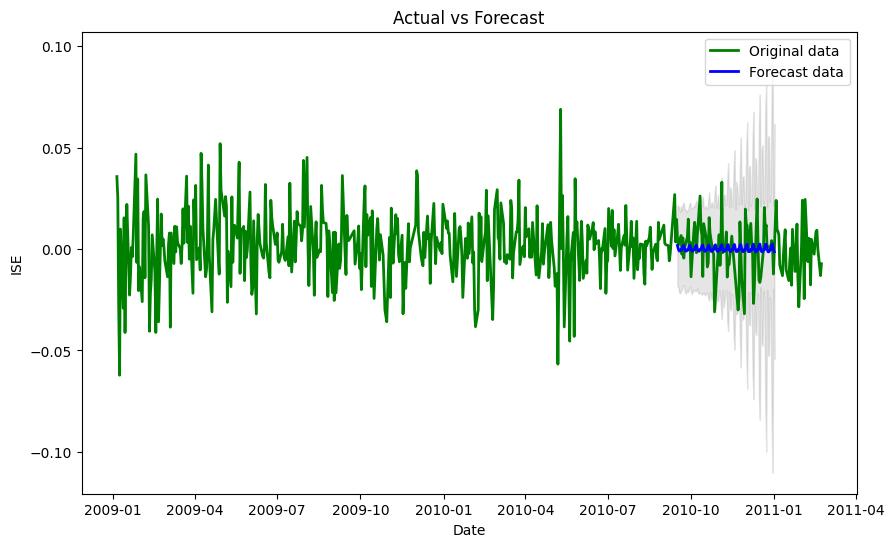

In [113]:
# visualize the data
plt.figure(figsize=(10,6))

# plot the actual data
plt.plot(fbp_data['ds'], fbp_data['y'], label='Original data', color='green', linewidth=2)

# plot the forecast data for test dataset
plt.plot(forecast_test_data['ds'], forecast_test_data['yhat'], label='Forecast data', color='blue', linewidth=2)

# Fill the area between the forecast bounds
plt.fill_between(forecast_test_data['ds'], forecast_test_data['yhat_lower'], forecast_test_data['yhat_upper'], color='gray', alpha=0.2)

# customize the plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('ISE')
plt.title('Actual vs Forecast')

# show the plot
plt.show()



In [114]:
# Calculate the error matrics

# Merge the forecasted values with the actual data
predicted_data = fbp_test.copy()
predicted_data = predicted_data.merge(forecast_test_data[['ds', 'yhat']], on='ds')

# calculate the MAE
fbp_mae = mean_absolute_error(predicted_data['y'], predicted_data['yhat'])

# claculate the RMSE
fbp_rmse = np.sqrt(mean_squared_error(predicted_data['y'], predicted_data['yhat']))

print(f"Mean Absolute Error (MAE):{fbp_mae}")
print(f"Root Mean sqaure Error (RMSE):{fbp_rmse}")

Mean Absolute Error (MAE):0.009990206917940806
Root Mean sqaure Error (RMSE):0.013125455935162143
